In [1]:
import numpy as np

In [82]:
def random_string(n, Sigma=["A","C","G","T"]):
    return np.random.choice(Sigma, size=n)

def perturb_string(s, p, Sigma=["A","C","G","T"]):
    out = []
    for c in s:
        new_c = c
        if np.random.uniform() < p:
            j = (Sigma.index(c) + np.random.choice([1,2,3])) % len(Sigma)
            new_c = Sigma[j]
        out.append(new_c)
    return np.asarray(out)

def edit_distance(x, y):
    n = len(x)
    m = len(y)
    M = np.zeros([n+1,m+1], dtype=np.int)
    M[0,:] = np.arange(0,M.shape[1])
    M[:,0] = np.arange(0,M.shape[0])
    for i in range(1,n+1):
        for j in range(1,m+1):
            delta = int(x[i-1] != y[j-1])
            M[i,j] = np.min([
                M[i-1, j-1] + delta,
                M[i-1, j] + 1,
                M[i, j-1] + 1
            ])
    return M[n,m]
    

In [83]:
x = random_string(10)
y = perturb_string(x, 0.2)

In [84]:
print(x)
print(y)
print(edit_distance(x,y))

['A' 'A' 'T' 'A' 'T' 'A' 'A' 'G' 'T' 'C']
['A' 'G' 'T' 'A' 'C' 'A' 'A' 'G' 'T' 'C']
2


In [100]:
n = 256
N = 20
ps = np.linspace(0,1,11)
Ds = []
for p in ps:
    D = 0
    for i in range(N):
        x = random_string(n)
        y = perturb_string(x, p)
        D += edit_distance(x, y)
    print(D/N)
    Ds.append(D/N)

0.0
25.9
52.55
76.15
94.1
115.65
130.8
137.55
139.7
138.6
141.75


In [102]:
import matplotlib.pyplot as plt

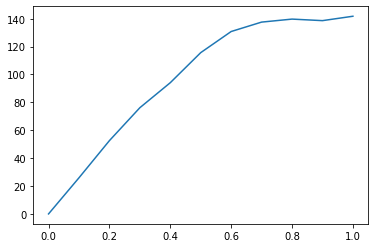

In [103]:
plt.plot(ps, Ds)